In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Step 1: Data Preparation

In [2]:
raw_data = pd.read_excel('IMB469-XLS-ENG (2).xlsx')

In [3]:
raw_data.head(2)

,Agmt No,Contract Status,Start_Date,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,...,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag,DefaulterType,DATASET
0,AP18100057,Closed,19/01/2001,26,2,4.500,1.0,1.5,0.27,0,...,0,1,1,0,0,AP2,Vizag,0,0,BUILD
1,AP18100140,Closed,2001-05-10 00:00:00,28,2,5.589,1.0,2.0,0.25,0,...,0,1,1,1,0,AP2,Vizag,0,0,BUILD


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28906 entries, 0 to 28905
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agmt No          28906 non-null  object 
 1   Contract Status  28906 non-null  object 
 2   Start_Date       25606 non-null  object 
 3   AGE              28906 non-null  int64  
 4   NOOFDEPE         28906 non-null  int64  
 5   MTHINCTH         28906 non-null  float64
 6   SALDATFR         28906 non-null  float64
 7   TENORYR          28906 non-null  float64
 8   DWNPMFR          28906 non-null  float64
 9   PROFBUS          28906 non-null  int64  
 10  QUALHSC          28906 non-null  int64  
 11  QUAL_PG          28906 non-null  int64  
 12  SEXCODE          28906 non-null  int64  
 13  FULLPDC          28906 non-null  int64  
 14  FRICODE          28906 non-null  int64  
 15  WASHCODE         28906 non-null  int64  
 16  Region           28906 non-null  object 
 17  Branch      

Eliminar columnas irrelevantes

In [5]:
data = raw_data.drop(["Agmt No", "Contract Status", "Start_Date"], axis=1)

In [6]:
data["DATASET"].value_counts()

DATASET
VALIDATE    15133
BUILD       13773
Name: count, dtype: int64

Distribucion por el dataset

In [33]:
train_data = data[data["DATASET"]=="BUILD"].reset_index()
test_data = data[data["DATASET"]=="VALIDATE"].reset_index()

Distribucion usual

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [34]:
train_data = train_data.drop(["DATASET"], axis=1)
test_data = test_data.drop(["DATASET"], axis=1)


In [35]:
train_data.head(2)

,index,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag,DefaulterType
0,0,26,2,4.500,1.0,1.5,0.27,0,0,0,1,1,0,0,AP2,Vizag,0,0
1,1,28,2,5.589,1.0,2.0,0.25,0,0,0,1,1,1,0,AP2,Vizag,0,0


In [36]:
test_data.head(2)

,index,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,FULLPDC,FRICODE,WASHCODE,Region,Branch,DefaulterFlag,DefaulterType
0,13773,30,2,12.50000,1.03,0.92,0.55,0,0,0,1,1,0,0,AP2,Vizag,1,1
1,13774,43,3,4.55833,1.03,0.92,0.37,0,1,0,1,1,0,0,AP2,Vizag,0,0


### Step 2: Feature scaling and categorycal rep.

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13773 entries, 0 to 13772
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          13773 non-null  int64  
 1   AGE            13773 non-null  int64  
 2   NOOFDEPE       13773 non-null  int64  
 3   MTHINCTH       13773 non-null  float64
 4   SALDATFR       13773 non-null  float64
 5   TENORYR        13773 non-null  float64
 6   DWNPMFR        13773 non-null  float64
 7   PROFBUS        13773 non-null  int64  
 8   QUALHSC        13773 non-null  int64  
 9   QUAL_PG        13773 non-null  int64  
 10  SEXCODE        13773 non-null  int64  
 11  FULLPDC        13773 non-null  int64  
 12  FRICODE        13773 non-null  int64  
 13  WASHCODE       13773 non-null  int64  
 14  Region         13773 non-null  object 
 15  Branch         13773 non-null  object 
 16  DefaulterFlag  13773 non-null  int64  
 17  DefaulterType  13773 non-null  int64  
dtypes: flo

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on numeric features
train_data_scaled = train_data.copy()
numeric_features = ["AGE", "NOOFDEPE", "MTHINCTH", "SALDATFR", "TENORYR", "DWNPMFR"]
train_data_scaled[numeric_features] = scaler.fit_transform(train_data[numeric_features])

In [39]:
# Fit and transform the scaler on numeric features
test_data_scaled = test_data.copy()
numeric_features = ["AGE", "NOOFDEPE", "MTHINCTH", "SALDATFR", "TENORYR", "DWNPMFR"]
test_data_scaled[numeric_features] = scaler.fit_transform(test_data[numeric_features])

In [40]:
# Convert categorical features to one-hot encoded columns
train_data_encoded = pd.get_dummies(train_data_scaled, columns=["Region", "Branch"])

# Separate features and target variable
X_train = train_data_encoded.drop(["DefaulterFlag", "DefaulterType"], axis=1)
y_train = train_data_encoded["DefaulterFlag"]

In [41]:
# Convert categorical features to one-hot encoded columns
test_data_encoded = pd.get_dummies(test_data_scaled, columns=["Region", "Branch"])

# Prepare test data
X_test = test_data_encoded.drop(["DefaulterFlag", "DefaulterType"], axis=1)
y_test = test_data_encoded["DefaulterFlag"]

### Step 3: Model Training

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Initialize models
logreg_model = LogisticRegression(max_iter=10000)
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train models
logreg_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC()

### Step 4: Model Evaluation

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
logreg_pred = logreg_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_pred)
tree_accuracy = accuracy_score(y_test, tree_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

logreg_precision = precision_score(y_test, logreg_pred)
tree_precision = precision_score(y_test, tree_pred)
rf_precision = precision_score(y_test, rf_pred)
svm_precision = precision_score(y_test, svm_pred)

logreg_recall = recall_score(y_test, logreg_pred)
tree_recall = recall_score(y_test, tree_pred)
rf_recall = recall_score(y_test, rf_pred)
svm_recall = recall_score(y_test, svm_pred)

logreg_f1 = f1_score(y_test, logreg_pred)
tree_f1 = f1_score(y_test, tree_pred)
rf_f1 = f1_score(y_test, rf_pred)
svm_f1 = f1_score(y_test, svm_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Branch_Tirunelvelli
- Branch_Tirupathi
- Branch_Vellore
- Region_AP1
- Region_Vellore
Feature names seen at fit time, yet now missing:
- Branch_Coimbattore
- Branch_Salem
- Branch_Vijayawada
- Region_TN2


In [ ]:
print(f'logreg_accuracy: {logreg_accuracy}, tree_accuracy: {tree_accuracy}, rf_accuracy: {rf_accuracy}, svm_accuracy: {svm_accuracy}')
print(f'logreg_f1: {logreg_f1}, tree_f1: {tree_f1}, rf_f1: {rf_f1}, svm_f1: {svm_f1}')

logreg_accuracy: 0.7433414043583535, tree_accuracy: 0.6452784503631961, rf_accuracy: 0.7277758561051539, svm_accuracy: 0.7409200968523002
logreg_f1: 0.8370305293213266, tree_f1: 0.7481272258381432, rf_f1: 0.8238191179762704, svm_f1: 0.837244676227727


### Step 5: Interpretability

Explain the decision rules forthe models using their .feature_importances_ and .coef_ attributes.

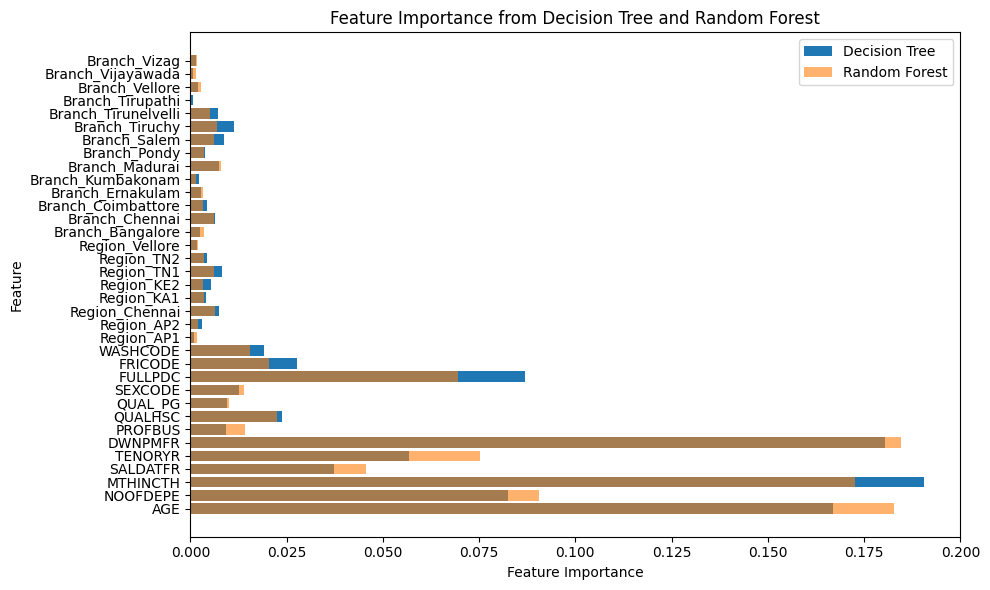

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the models
tree_feature_importances = tree_model.feature_importances_
rf_feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), tree_feature_importances, align='center', label='Decision Tree')
plt.barh(range(len(feature_names)), rf_feature_importances, align='center', label='Random Forest', alpha=0.6)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree and Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


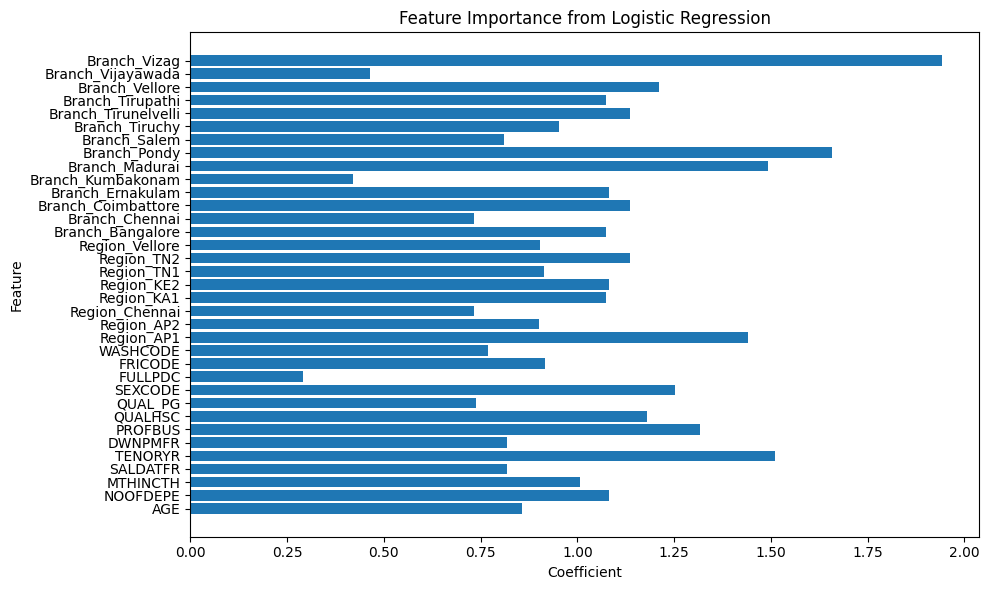

In [ ]:
# Get absolute coefficients from the logistic regression model
logreg_coeffs = np.exp(logreg_model.coef_[0])

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), logreg_coeffs, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()

### Step 6: Parameter Tuning

You can use techniques like grid search or random search to find optimal hyperparameters for each algorithm

Parameter tuning is a crucial step in optimizing the performance of machine learning models. Each algorithm has various parameters that can be adjusted to improve their predictive accuracy and generalization. In this step, you search for the best combination of parameter values to achieve the best model performance. Let's go through an explanation and example for each algorithm.

1. Logistic Regression:

For logistic regression, one common parameter is the regularization strength (C). A smaller C increases the regularization, which can prevent overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_C = grid_search.best_params_['C']

# Train a Logistic Regression model with the best parameter
best_logreg_model = LogisticRegression(C=best_C)
best_logreg_model.fit(X_train, y_train)


LogisticRegression(C=10)

2. Decision Trees:

For decision trees, an important parameter is the maximum depth of the tree (max_depth). A deeper tree can lead to overfitting, so you need to find an optimal value for this parameter.

In [ ]:
param_grid = {'max_depth': [None, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

best_tree_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

3. Random Forest:

Random Forests have parameters like the number of trees (n_estimators) and the maximum depth of each tree (max_depth). Tuning these parameters can improve the performance of the ensemble.

In [ ]:
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

best_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50)

4. Support Vector Machines (SVM):

For SVMs, parameters like the regularization parameter (C) and the choice of kernel (kernel) are important to tune. The kernel can be linear, polynomial, or radial basis function (RBF).

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

best_svm_model = SVC(C=best_C, kernel=best_kernel)
best_svm_model.fit(X_train, y_train)


In each example, we're using GridSearchCV to perform a grid search over the specified parameter values. The cv parameter indicates the number of folds in cross-validation, and scoring specifies the evaluation metric. After finding the best parameter combination, a new model is trained using the best parameters.

Remember that these are simplified examples, and you can explore more parameters and values to fine-tune your models further. Also, be mindful of the computational cost of exhaustive grid searches, as they can become time-consuming with larger datasets or complex models.